In [1]:
from almanac.data.data import pd_readcsv


In [2]:
from almanac.analysis.calculate_returns import calculate_perc_returns

In [3]:
from almanac.utils.utils import *



In [4]:
from almanac.analysis.calculate_stats import Stats

In [5]:
data=pd_readcsv(filename='../sample_data/jumbo/SP500_micro.csv')
data

,adjusted,underlying
1982-09-14,64.23,123.70
1982-09-15,64.49,124.20
1982-09-16,64.16,123.55
1982-09-17,63.69,122.65
1982-09-20,64.10,123.45
...,...,...
2022-12-22,3857.50,3847.50
2022-12-23,3826.25,3868.50
2022-12-27,3846.00,3856.25
2022-12-28,3862.00,3810.50


In [6]:
adjusted_price = data.adjusted
current_price = data.underlying
multiplier = 5
fx_series = pd.Series(1, index=data.index)  
position_contracts_held = pd.Series(1, index=data.index)  

capital_required = multiplier * current_price 


In [7]:
perc_return = calculate_perc_returns(
    position_contracts_held=position_contracts_held,
    adjusted_price = adjusted_price,
    fx_series=fx_series,
    capital_required=capital_required,
    multiplier=multiplier
)



In [8]:
a = Stats(perc_return)

In [9]:
a.stats()

In [10]:
a.stats(show=True)

{'ann_mean': 0.06585196239485189,
 'ann_std': 0.18093855391636124,
 'sharpe_ratio': 0.3639465496407798,
 'skew': -1.3573059970080554,
 'avg_drawdown': 0.13717618986430086,
 'max_drawdown': 1.0092391466728226,
 'quant_ratio_lower': 2.50673620513012,
 'quant_ratio_upper': 1.8784002761075556}

In [11]:
a.show_stats()

{'ann_mean': 0.06585196239485189,
 'ann_std': 0.18093855391636124,
 'sharpe_ratio': 0.3639465496407798,
 'skew': -1.3573059970080554,
 'avg_drawdown': 0.13717618986430086,
 'max_drawdown': 1.0092391466728226,
 'quant_ratio_lower': 2.50673620513012,
 'quant_ratio_upper': 1.8784002761075556}

### Strategy 2

In [12]:
import pandas as pd
from almanac.data.data import pd_readcsv
from almanac.analysis.calculate_returns import calculate_perc_returns
from almanac.utils.utils import *
from almanac.analysis.calculate_stats import Stats
from almanac.analysis.positions import calculate_position_series_given_fixed_risk
from almanac.analysis.std_for_risk import calculate_standard_deviation_for_risk_targeting


In [14]:
data=pd_readcsv(filename='../sample_data/jumbo/SP500_micro.csv')
data

,adjusted,underlying
1982-09-14,64.23,123.70
1982-09-15,64.49,124.20
1982-09-16,64.16,123.55
1982-09-17,63.69,122.65
1982-09-20,64.10,123.45
...,...,...
2022-12-22,3857.50,3847.50
2022-12-23,3826.25,3868.50
2022-12-27,3846.00,3856.25
2022-12-28,3862.00,3810.50


In [15]:
data = data.dropna()

adjusted_price = data.adjusted
current_price = data.underlying
multiplier = 5
risk_target_tau= .2
fx_series = pd.Series(1, index=data.index)  ## FX rate, 1 for USD / USD

capital= 100000

instrument_risk = calculate_standard_deviation_for_risk_targeting(adjusted_price=adjusted_price,
                                                                    current_price=current_price)

position_contracts_held = calculate_position_series_given_fixed_risk(capital=capital,
                                                                        fx=fx_series,
                                                                        instrument_risk_ann_perc=instrument_risk,
                                                                        risk_target_tau=risk_target_tau,
                                                                        multiplier=multiplier,
                                                                        current_price=current_price)


In [16]:
perc_return = calculate_perc_returns(
        position_contracts_held=position_contracts_held,
        adjusted_price = adjusted_price,
        fx_series=fx_series,
        capital_required=capital,
        multiplier=multiplier
    )

In [17]:
b= Stats(perc_return)
b.stats()
b.show_stats()

{'ann_mean': 0.08745210586670944,
 'ann_std': 0.16186643736950865,
 'sharpe_ratio': 0.5402732480426057,
 'skew': -0.29982654232831585,
 'avg_drawdown': 0.07193883664075885,
 'max_drawdown': 0.7048049395414959,
 'quant_ratio_lower': 2.377732862596227,
 'quant_ratio_upper': 1.9862950330190954}

In [18]:
b= Stats(perc_return)
b.stats()
b.show_stats()

{'ann_mean': 0.08745210586670944,
 'ann_std': 0.16186643736950865,
 'sharpe_ratio': 0.5402732480426057,
 'skew': -0.29982654232831585,
 'avg_drawdown': 0.07193883664075885,
 'max_drawdown': 0.7048049395414959,
 'quant_ratio_lower': 2.377732862596227,
 'quant_ratio_upper': 1.9862950330190954}

### Strategy 3

In [27]:
import pandas as pd
from almanac.data.data import pd_readcsv
from almanac.analysis.calculate_returns import calculate_perc_returns
from almanac.utils.utils import *
from almanac.analysis.calculate_stats import Stats
from almanac.utils.standardDeviation import standardDeviation
from almanac.analysis.positions import calculate_position_series_given_variable_risk


In [28]:
data=pd_readcsv(filename='../sample_data/jumbo/SP500_micro.csv')
data

,adjusted,underlying
1982-09-14,64.23,123.70
1982-09-15,64.49,124.20
1982-09-16,64.16,123.55
1982-09-17,63.69,122.65
1982-09-20,64.10,123.45
...,...,...
2022-12-22,3857.50,3847.50
2022-12-23,3826.25,3868.50
2022-12-27,3846.00,3856.25
2022-12-28,3862.00,3810.50


In [29]:
data = data.dropna()

adjusted_price = data.adjusted
current_price = data.underlying
multiplier = 5
risk_target_tau = 0.2
fx_series = pd.Series(1, index=data.index)  ## FX rate, 1 for USD / USD

capital = 100000  ## applies only to strategy 1

## eithier use annual # % returns, or daily price differences to calculate
instrument_risk = standardDeviation(
    adjusted_price=adjusted_price,
    current_price=current_price,
    use_perc_returns=True,
    annualise_stdev=True,
)

## or
"""
instrument_risk = standardDeviation(adjusted_price=adjusted_price,
                                            current_price=current_price,
                                                use_perc_returns=False,
                                                annualise_stdev=False)
"""

position_contracts_held = calculate_position_series_given_variable_risk(
    capital=capital,
    fx=fx_series,
    instrument_risk=instrument_risk,
    risk_target_tau=risk_target_tau,
    multiplier=multiplier,
)

perc_return = calculate_perc_returns(
    position_contracts_held=position_contracts_held,
    adjusted_price=adjusted_price,
    fx_series=fx_series,
    capital_required=capital,
    multiplier=multiplier,
)


In [39]:
c= Stats(perc_return)
c.stats()
c.show_stats()

/home/ornob/miniconda3/envs/almanac/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/ornob/miniconda3/envs/almanac/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/home/ornob/miniconda3/envs/almanac/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/ornob/miniconda3/envs/almanac/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/ornob/miniconda3/envs/almanac/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/home/ornob/mi

{'ann_mean': nan,
 'ann_std': nan,
 'sharpe_ratio': nan,
 'skew': nan,
 'avg_drawdown': inf,
 'max_drawdown': inf,
 'quant_ratio_lower': nan,
 'quant_ratio_upper': nan}

### Strategy 4

In [14]:
import pandas as pd
from almanac.data.data import get_data_dict
from almanac.analysis.calculate_returns import calculate_perc_returns, aggregate_returns
from almanac.utils.utils import *
from almanac.analysis.calculate_stats import Stats
from almanac.utils.standardDeviation import standardDeviation
from almanac.utils.fx_series import create_fx_series_given_adjusted_prices_dict
from almanac.analysis.std_for_risk import calculate_variable_standard_deviation_for_risk_targeting_from_dict
from almanac.analysis.positions import calculate_position_series_given_variable_risk_for_dict
from almanac.analysis.calculate_returns import calculate_perc_returns_for_dict
from almanac.config.instruments import *
import quantstats as qs
# read=Read_csv()

In [9]:
adjusted_prices, current_prices = get_data_dict('../sample_data/jumbo/',INSTRUMENT_LIST)



fx_series_dict = create_fx_series_given_adjusted_prices_dict('../sample_data/fx_data/',adjusted_prices)
risk_target_tau= 0.2
capital = 1000000
idm = 1.5

std_dev_dict = calculate_variable_standard_deviation_for_risk_targeting_from_dict(
    adjusted_prices=adjusted_prices,
    current_prices=current_prices,
    annualise_stdev=True,  ## can also be False if want to use daily price diff
    use_perc_returns=True,  ## can also be False if want to use daily price diff
)

position_contracts_dict = calculate_position_series_given_variable_risk_for_dict(
    capital=capital,
    risk_target_tau=risk_target_tau,
    idm=idm,
    weights=instrument_weights,
    std_dev_dict=std_dev_dict,
    fx_series_dict=fx_series_dict,
    multipliers=multipliers,
)

perc_return_dict = calculate_perc_returns_for_dict(
    position_contracts_dict=position_contracts_dict,
    fx_series=fx_series_dict,
    multipliers=multipliers,
    capital=capital,
    adjusted_prices=adjusted_prices,
)

In [13]:
perc_return_dict

{'US2': 2000-03-02         NaN
 2000-03-03         NaN
 2000-03-06         NaN
 2000-03-07    0.000249
 2000-03-08   -0.000022
                 ...   
 2022-12-21    0.000357
 2022-12-22   -0.000179
 2022-12-23   -0.000263
 2022-12-27   -0.000184
 2022-12-28   -0.000042
 Length: 5880, dtype: float64,
 'US3': 2020-08-27         NaN
 2020-08-28         NaN
 2020-08-31         NaN
 2020-09-01    0.000030
 2020-09-02   -0.000031
                 ...   
 2022-12-21    0.000171
 2022-12-22   -0.000079
 2022-12-23   -0.000147
 2022-12-27   -0.000108
 2022-12-28   -0.000027
 Length: 589, dtype: float64,
 'US5': 1989-05-31         NaN
 1989-06-01         NaN
 1989-06-02         NaN
 1989-06-05    0.000144
 1989-06-06    0.000010
                 ...   
 2022-12-21    0.000272
 2022-12-22   -0.000163
 2022-12-23   -0.000306
 2022-12-27   -0.000202
 2022-12-28   -0.000090
 Length: 8568, dtype: float64,
 'US10': 1982-08-30         NaN
 1982-08-31         NaN
 1982-09-01         NaN
 1982-09-02    

In [11]:
perc_return_agg = aggregate_returns(perc_return_dict)

/home/ornob/miniconda3/envs/almanac/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/ornob/miniconda3/envs/almanac/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/ornob/miniconda3/envs/almanac/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=

                           Strategy
-------------------------  ----------
Start Period               1970-02-06
End Period                 2022-12-30
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          271.31%
CAGR﹪                     1.73%

Sharpe                     0.43
Prob. Sharpe Ratio         100.0%
Smart Sharpe               0.41
Sortino                    0.89
Smart Sortino              0.84
Sortino/√2                 0.63
Smart Sortino/√2           0.59
Omega                      1.14

Max Drawdown               -29.35%
Longest DD Days            6615
Volatility (ann.)          5.68%
Calmar                     0.06
Skew                       33.76
Kurtosis                   2207.1

Expected Daily %           0.01%
Expected Monthly %         0.21%
Expected Yearly %          2.51%
Kelly Criterion            6.4%
Risk of Ruin               0.0%
Daily Value-at-Risk        -0.58%
Expected Shortfall (cVaR)  -0.58%

Max Consecutive Wins    

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-11-22,2022-12-29,2022-12-30,404,-29.345484,-29.007674
2,2014-09-02,2016-01-21,2017-02-24,907,-11.077582,-10.373311
3,2001-01-11,2002-04-12,2004-04-09,1185,-10.463689,-10.201299
4,2018-01-26,2018-12-26,2019-06-19,510,-10.260040,-9.299431
5,1980-11-21,1986-07-14,1998-12-31,6615,-9.764119,-8.869344


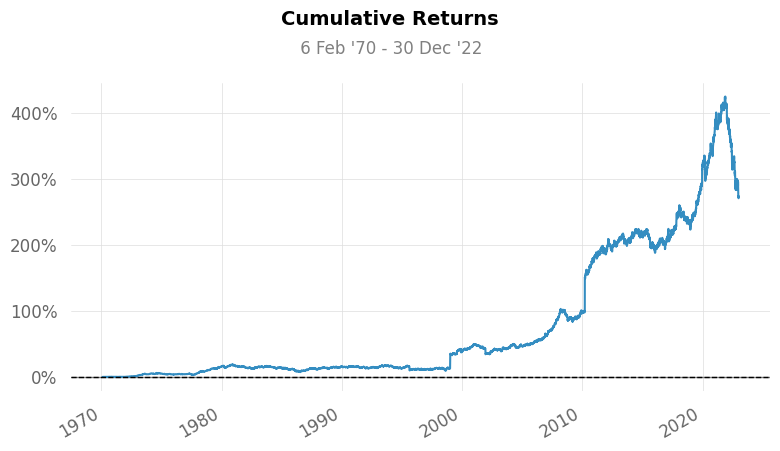

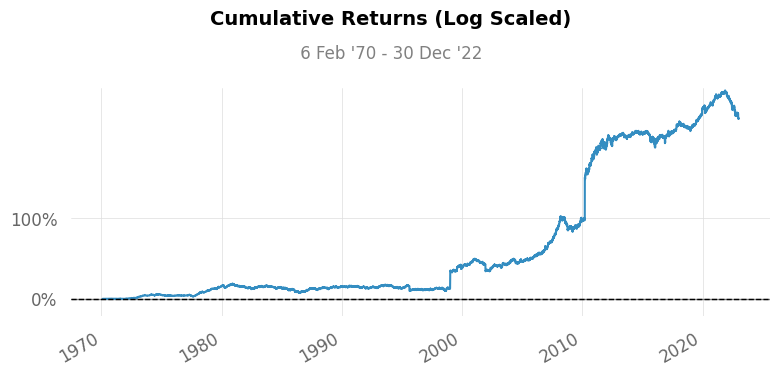

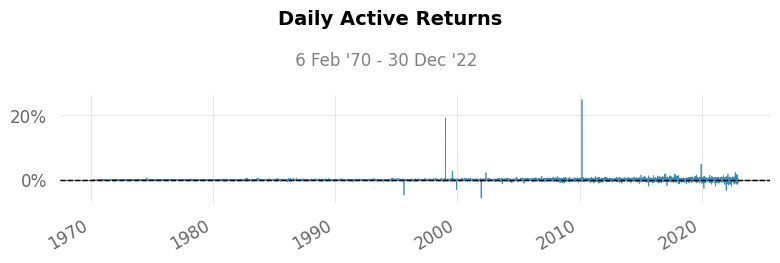

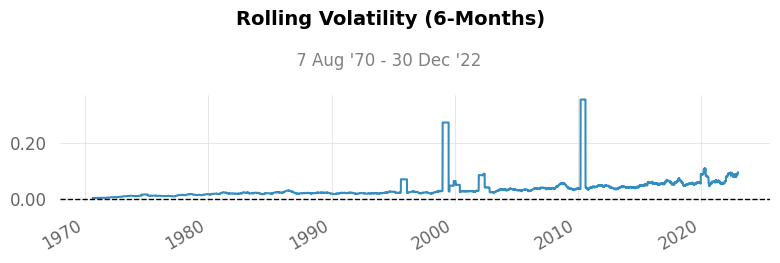

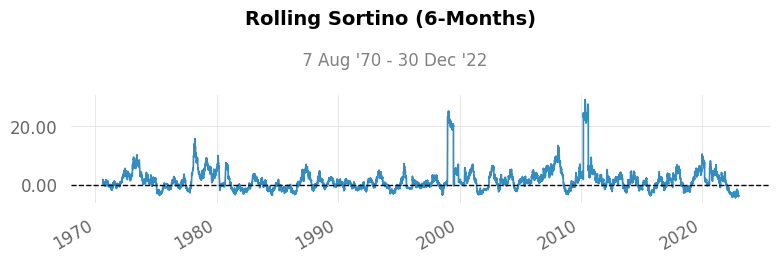

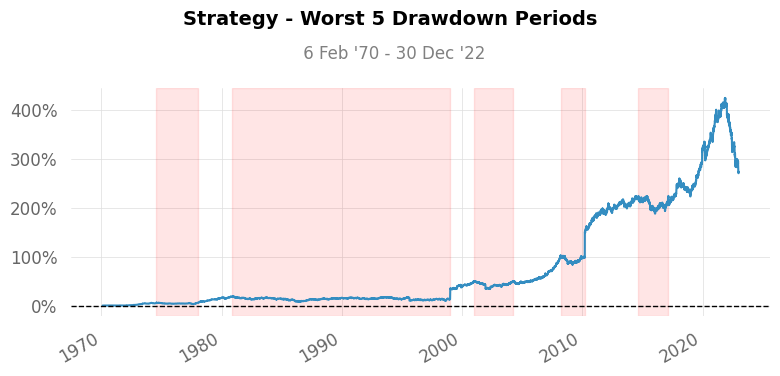

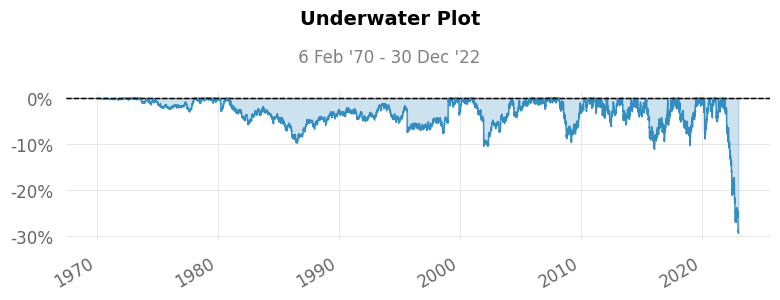

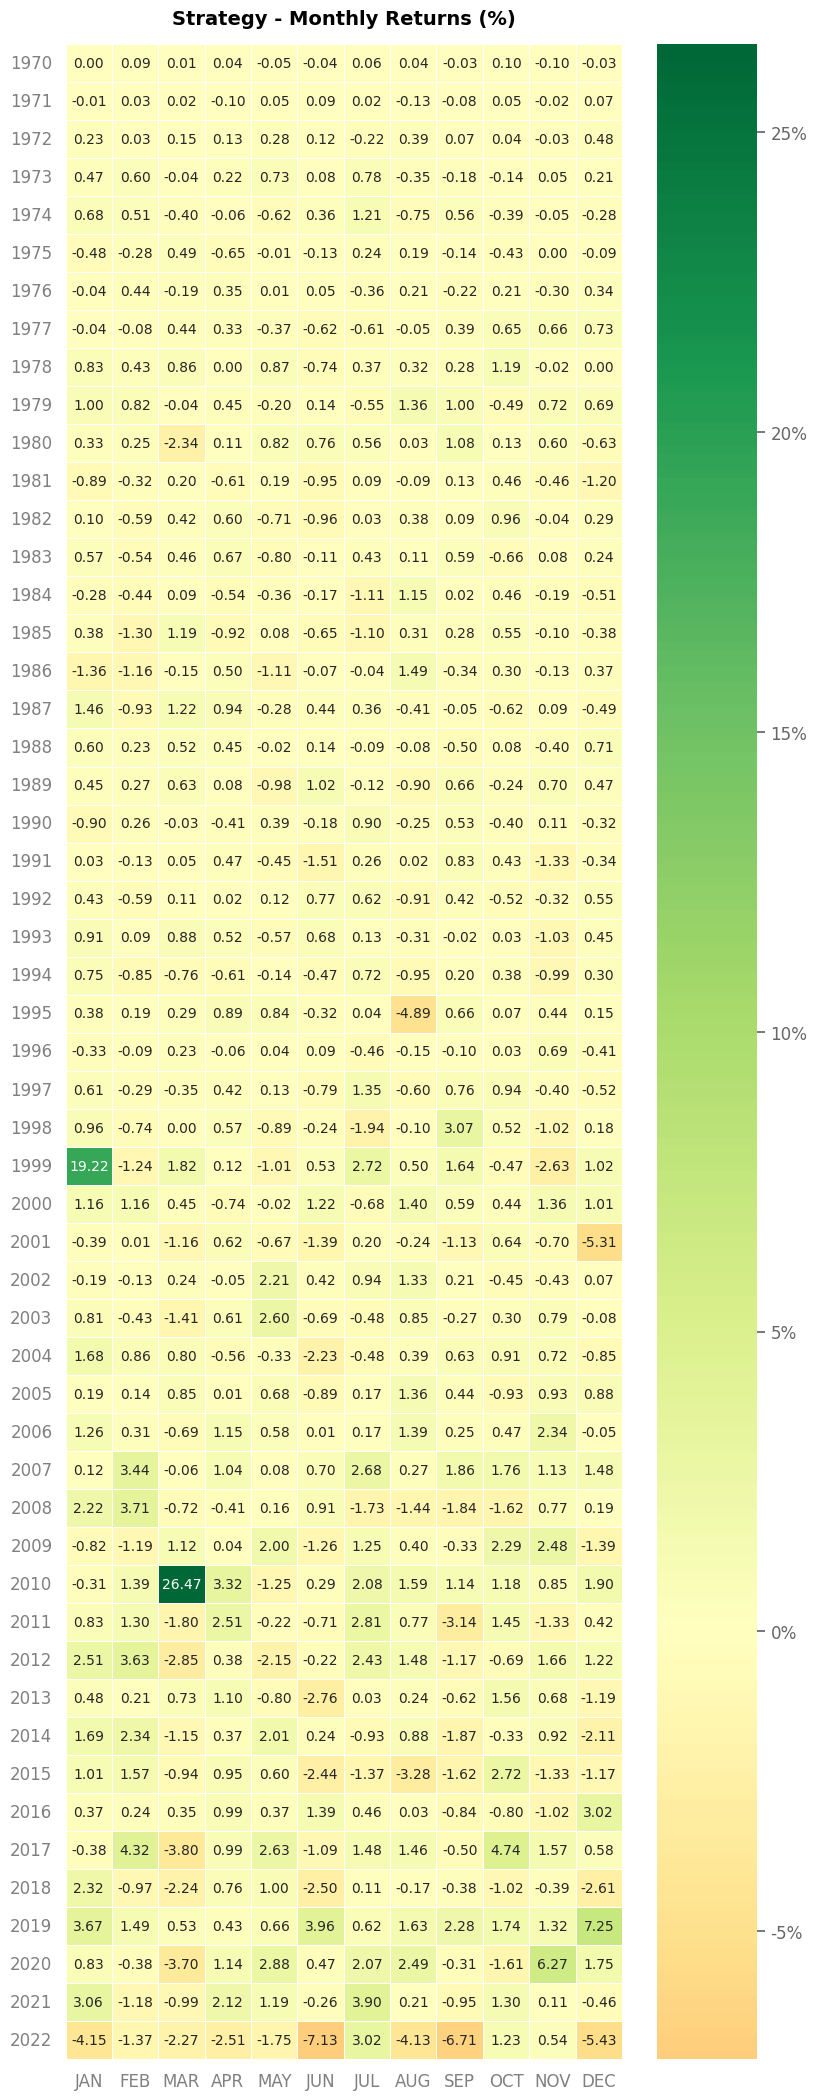

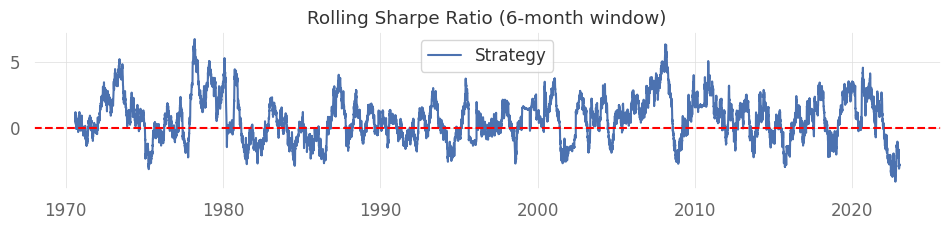

In [15]:
qs.reports.full(perc_return_agg)

In [24]:
perc_return_agg

1970-02-06   -0.000008
1970-02-09    0.000051
1970-02-10    0.000086
1970-02-11    0.000151
1970-02-12   -0.000043
                ...   
2022-12-26    0.000034
2022-12-27    0.003828
2022-12-28   -0.007791
2022-12-29   -0.000802
2022-12-30    0.002428
Length: 14337, dtype: float64

In [26]:
b= Stats(perc_return_agg)
b.stats()
b.show_stats()

/home/ornob/miniconda3/envs/almanac/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/ornob/miniconda3/envs/almanac/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/home/ornob/miniconda3/envs/almanac/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/ornob/miniconda3/envs/almanac/lib/python3.10/site-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/ornob/miniconda3/envs/almanac/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/home/ornob/mi

{'ann_mean': nan,
 'ann_std': nan,
 'sharpe_ratio': nan,
 'skew': nan,
 'avg_drawdown': inf,
 'max_drawdown': inf,
 'quant_ratio_lower': nan,
 'quant_ratio_upper': nan}